In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tit = pd.read_csv('/Users/madhavan/Desktop/titanic/data/test.csv')

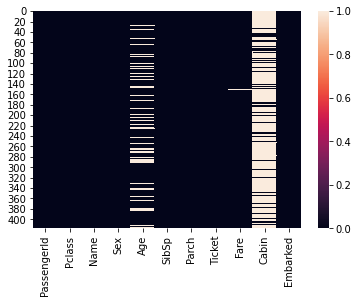

In [3]:
sns.heatmap(tit.isnull())

In [4]:
miss = tit.isnull().mean() * 100

In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
pass_id = tit.pop('PassengerId')

In [7]:
miss = miss[miss > 0]
miss

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

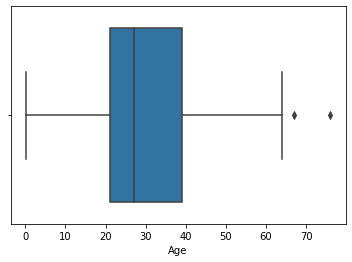

In [8]:
sns.boxplot(tit['Age'])

In [9]:
tit['Name_status'] = tit['Name'].map(lambda x:x.split()[1])

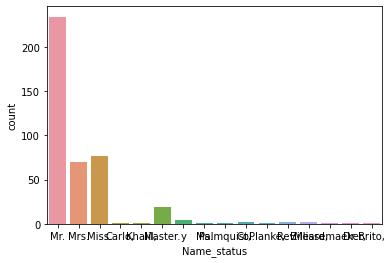

In [10]:
sns.countplot(tit['Name_status'])

In [11]:
tit['Name_status'].value_counts()[4:]

y               4
Rev.            2
Billiard,       2
Col.            2
Ms.             1
Palmquist,      1
Khalil,         1
Dr.             1
Carlo,          1
Messemaeker,    1
Planke,         1
Brito,          1
Name: Name_status, dtype: int64

In [12]:
tit['Name_status'][tit['Name_status'].isin(tit['Name_status'].value_counts()[4:].index)] = 'Other'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
tit['star'] = tit['Ticket'].map(lambda x:x.split()[0])
tit['star'][tit['star'].map(lambda x:x.isnumeric())] = np.nan

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
tit['star'] = tit['star'].replace(np.nan, 'No Ticket Label')

In [15]:
tit = tit[tit.columns.difference(['Name'])]

In [16]:
tit['miss_info'] = tit.isnull().sum(axis = 1)

In [17]:
tit['Cabin_Alph'] = tit['Cabin'].dropna().map(lambda x:x.split()[0][0])

In [18]:
tit

,Age,Cabin,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Ticket,star,miss_info,Cabin_Alph
0,34.5,NaN,Q,7.8292,Mr.,0,3,male,0,330911,No Ticket Label,1,NaN
1,47.0,NaN,S,7.0000,Mrs.,0,3,female,1,363272,No Ticket Label,1,NaN
2,62.0,NaN,Q,9.6875,Mr.,0,2,male,0,240276,No Ticket Label,1,NaN
3,27.0,NaN,S,8.6625,Mr.,0,3,male,0,315154,No Ticket Label,1,NaN
4,22.0,NaN,S,12.2875,Mrs.,1,3,female,1,3101298,No Ticket Label,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,Mr.,0,3,male,0,A.5. 3236,A.5.,2,NaN
414,39.0,C105,C,108.9000,Other,0,1,female,0,PC 17758,PC,0,C
415,38.5,NaN,S,7.2500,Mr.,0,3,male,0,SOTON/O.Q. 3101262,SOTON/O.Q.,1,NaN
416,NaN,NaN,S,8.0500,Mr.,0,3,male,0,359309,No Ticket Label,2,NaN


In [19]:
tit['Cabin_Alph']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin_Alph, Length: 418, dtype: object

In [20]:
tit['Cabin_Alph'] = tit['Cabin_Alph'].replace(np.nan,'Cabin Not Alloted')

In [21]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scal

In [22]:
tit['Age_bins'] = pd.cut(tit['Age'] , bins = [0.419,14,19,22,25,28,31.8,36,41,50,80] , right = True)

In [23]:
tit['Age_bins'] = tit['Age_bins'].replace(np.nan,'Not_given')

In [24]:
tit = tit[tit.columns.difference(['Age'])]

In [25]:
tit

,Age_bins,Cabin,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Ticket,miss_info,star
0,"(31.8, 36.0]",NaN,Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,330911,1,No Ticket Label
1,"(41.0, 50.0]",NaN,Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,363272,1,No Ticket Label
2,"(50.0, 80.0]",NaN,Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,240276,1,No Ticket Label
3,"(25.0, 28.0]",NaN,Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,315154,1,No Ticket Label
4,"(19.0, 22.0]",NaN,Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,3101298,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,A.5. 3236,2,A.5.
414,"(36.0, 41.0]",C105,C,C,108.9000,Other,0,1,female,0,PC 17758,0,PC
415,"(36.0, 41.0]",NaN,Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,SOTON/O.Q. 3101262,1,SOTON/O.Q.
416,NaN,NaN,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,359309,2,No Ticket Label


In [26]:
tit = tit[tit.columns.difference(['Cabin','Ticket'])]

In [27]:
tit.select_dtypes('object').columns

Index(['Cabin_Alph', 'Embarked', 'Name_status', 'Sex', 'star'], dtype='object')

In [28]:
tit['star'].value_counts()[2:]

C.A.          19
SOTON/O.Q.     8
SC/PARIS       6
W./C.          5
F.C.C.         4
CA.            4
CA             4
S.O./P.P.      4
C              3
A/5.           3
A/4            3
A/5            2
STON/O         2
F.C.           2
S.O.C.         2
SC/AH          2
SC/Paris       1
S.C./PARIS     1
STON/O2.       1
LP             1
W.E.P.         1
A.5.           1
PP             1
SC/A.3         1
SC             1
A./5.          1
SOTON/OQ       1
A.             1
AQ/3.          1
STON/OQ.       1
SOTON/O2       1
AQ/4           1
SC/A4          1
Name: star, dtype: int64

In [29]:
tit['star'][tit['star'].isin(tit['star'].value_counts()[2:].index)] = 'Other'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
tit['Cabin_Alph'].value_counts()[5:]

F    8
A    7
G    1
Name: Cabin_Alph, dtype: int64

In [31]:
tit['Cabin_Alph'][tit['Cabin_Alph'].isin(tit['Cabin_Alph'].value_counts()[5:].index)] = 'A_F_G_T'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
tit

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,"(31.8, 36.0]",Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,1,No Ticket Label
1,"(41.0, 50.0]",Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,1,No Ticket Label
2,"(50.0, 80.0]",Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,1,No Ticket Label
3,"(25.0, 28.0]",Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,1,No Ticket Label
4,"(19.0, 22.0]",Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,Other
414,"(36.0, 41.0]",C,C,108.9000,Other,0,1,female,0,0,PC
415,"(36.0, 41.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,1,Other
416,NaN,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,No Ticket Label


In [33]:
tit['Embarked'][tit['Embarked'].isna()] = 'C'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
tit['Fare'][tit['Fare'].isnull()] = tit['Fare'].median()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
tit.to_csv('ready_test.csv')

In [35]:
import copy
for_mod = copy.deepcopy(tit)

In [36]:
temp = for_mod.select_dtypes([object]).columns
temp

Index(['Age_bins', 'Cabin_Alph', 'Embarked', 'Name_status', 'Sex', 'star'], dtype='object')

In [37]:
dum = pd.get_dummies(for_mod.select_dtypes([object]))   #creating dummies
for x in for_mod.select_dtypes([object]).columns.difference(['Name_status']): #selecting original columns
    del dum[dum.filter(like = x).sum().sort_values().index[0]] #removing sub-categories under each category where sum is minimal
    del for_mod[x] #deleting the orginal column

dum

,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]","Age_bins_(28.0, 31.8]","Age_bins_(31.8, 36.0]","Age_bins_(41.0, 50.0]","Age_bins_(50.0, 80.0]",Age_bins_Not_given,...,Embarked_C,Embarked_S,Name_status_Master.,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
414,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
416,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0


In [56]:
dum = dum[dum.columns.difference(['Name_status_Master.'])]
for_mod = for_mod[for_mod.columns.difference(['Name_status'])]

In [57]:
for_mod[dum.columns] = dum
for_mod.head()

,Fare,Parch,Pclass,SibSp,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]",...,Cabin_Alph_D,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
0,7.8292,0,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,7.0000,0,3,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,9.6875,0,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,8.6625,0,3,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4,12.2875,1,3,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [59]:
X = for_mod

In [60]:
X['Pass_Id'] = pass_id
X

,Fare,Parch,Pclass,SibSp,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]",...,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other,Pass_Id
0,7.8292,0,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,892
1,7.0000,0,3,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,893
2,9.6875,0,2,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,894
3,8.6625,0,3,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,895
4,12.2875,1,3,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,8.0500,0,3,0,2,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,1305
414,108.9000,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1306
415,7.2500,0,3,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,1307
416,8.0500,0,3,0,2,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,1308


In [62]:
import statsmodels.api as sm
download = sm.add_constant(X)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
download.to_csv('test_for_log')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
pass_id_train = X_train.pop('Pass_Id')  #number assigned to each lead
pass_id_test = X_test.pop('Pass_Id')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #learning the co-efficients
model_1 = logm1.fit() #fitting the model
model_1.summary()

In [ ]:
y_train_pred = model_1.predict(X_train_sm).values   

In [ ]:
y_train_pred_df = pd.DataFrame({'Actual':y_train, 'Pred_Prob':y_train_pred})
y_train_pred_df['Pass_id'] = pass_id_train
y_train_pred_df.head()

In [ ]:
from sklearn import metrics

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'], drop_intermediate = False )

In [ ]:
draw_roc( y_train_pred_df['Actual'],y_train_pred_df['Pred_Prob'])

In [ ]:
numbers = [float(x)/10 for x in range(10)] # 0.1 to 0.10
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Pred_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.vlines(x=0.35, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.82,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing optimal cut-off point based on Sensitivity-specificity tradeoff' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

In [ ]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.vlines(x=0.44, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.79,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing the Tradeoff between precision and recall' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
plt.show()


In [ ]:
y_train_pred_df['final_predicted'] = y_train_pred_df['Pred_Prob'].map( lambda x: 1 if x >= 0.35 else 0)

y_train_pred_df.head()

In [ ]:
metrics.accuracy_score(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'])

In [ ]:
X_test.head()

In [ ]:
X_test[X_test.columns] = scaler.transform(X_test)  

In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

In [ ]:
y_test_pred = model_1.predict(X_test_sm)

In [ ]:
y_test_pred_df = pd.DataFrame({'Actual_TEST':y_test.values, 'Pred_Prob_TEST':y_test_pred})
y_test_pred_df['Pass_Id'] = pass_id_test
y_test_pred_df.head()

In [ ]:
y_test_pred_df['test_final'] = y_test_pred_df['Pred_Prob_TEST'].map( lambda x: 1 if x >= 0.35 else 0)

y_test_pred_df.head()

In [ ]:
metrics.accuracy_score(y_test_pred_df['Actual_TEST'], y_test_pred_df['test_final'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
decision = copy.deepcopy(tit)

In [39]:
decision['Age_bins'] = decision['Age_bins'].map(lambda x:str(x))

In [42]:
decision.to_csv('test_transform.csv')

In [44]:
decision = decision.apply(le.fit_transform)

NameError: name 'le' is not defined

In [45]:
decision

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,"(31.8, 36.0]",Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,1,No Ticket Label
1,"(41.0, 50.0]",Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,1,No Ticket Label
2,"(50.0, 80.0]",Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,1,No Ticket Label
3,"(25.0, 28.0]",Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,1,No Ticket Label
4,"(19.0, 22.0]",Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...
413,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,Other
414,"(36.0, 41.0]",C,C,108.9000,Other,0,1,female,0,0,PC
415,"(36.0, 41.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,1,Other
416,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,No Ticket Label


In [43]:
decision

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,"(31.8, 36.0]",Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,1,No Ticket Label
1,"(41.0, 50.0]",Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,1,No Ticket Label
2,"(50.0, 80.0]",Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,1,No Ticket Label
3,"(25.0, 28.0]",Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,1,No Ticket Label
4,"(19.0, 22.0]",Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...
413,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,Other
414,"(36.0, 41.0]",C,C,108.9000,Other,0,1,female,0,0,PC
415,"(36.0, 41.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,1,Other
416,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,No Ticket Label
